In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Dropout, Activation, MaxPooling2D, Flatten
import random

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
X_train_shaped = X_train.reshape(len(X_train), 28,28,1)

In [12]:
X_test_shaped = X_test.reshape(len(X_test), 28,28,1)

In [14]:
X_train_shaped.shape

(60000, 28, 28, 1)

In [15]:
X_test_shaped.shape

(10000, 28, 28, 1)

In [16]:
np.min(X_train)

np.uint8(0)

In [17]:
np.max(X_train)

np.uint8(255)

In [18]:
X_train_std = X_train_shaped/255.0

In [19]:
X_test_std = X_test_shaped/255.0

In [21]:
X_train_std.dtype

dtype('float64')

In [22]:
X_train_float = X_train_std.astype('float32')

In [23]:
X_test_float = X_test_std.astype('float32')

In [24]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [25]:
K = len(class_names)
K

10

### Sequential

In [28]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D((2,2)),

    Flatten(),
    Dropout(0.2),

    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(K, activation='softmax')
])

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
result = model.fit(X_train_float, y_train, validation_data=(X_test_float, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7975 - loss: 0.6562 - val_accuracy: 0.8888 - val_loss: 0.2988
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.8957 - loss: 0.2813 - val_accuracy: 0.9018 - val_loss: 0.2641
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9140 - loss: 0.2329 - val_accuracy: 0.9089 - val_loss: 0.2476
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9253 - loss: 0.2062 - val_accuracy: 0.9216 - val_loss: 0.2156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9341 - loss: 0.1790 - val_accuracy: 0.9210 - val_loss: 0.2060


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Dress


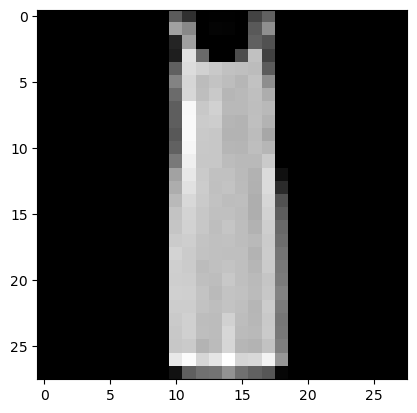

In [39]:
idx = random.randint(0, len(X_test)-1)
plt.imshow(X_test[idx], cmap='gray')
pred = model.predict(tf.expand_dims(X_test[idx], axis=0))
print(class_names[np.argmax(pred)])

### Functional

In [40]:
i = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), use_bias=False, padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dense(K, activation='softmax')(x)
model2 = Model(i,x)

In [41]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
result2 = model2.fit(X_train_float, y_train, validation_data=(X_test_float, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.8113 - loss: 0.5975 - val_accuracy: 0.8965 - val_loss: 0.2832
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9081 - loss: 0.2520 - val_accuracy: 0.9093 - val_loss: 0.2455
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9203 - loss: 0.2157 - val_accuracy: 0.9102 - val_loss: 0.2338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9329 - loss: 0.1812 - val_accuracy: 0.9207 - val_loss: 0.2100
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9431 - loss: 0.1551 - val_accuracy: 0.9178 - val_loss: 0.2296


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Shirt


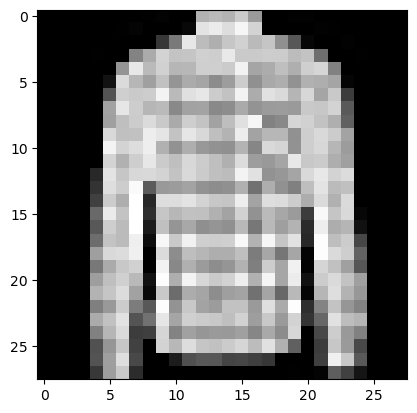

In [47]:
idx = random.randint(0, len(X_test)-1)
plt.imshow(X_test[idx], cmap='gray')
pred = model2.predict(tf.expand_dims(X_test[idx], axis=0))
print(class_names[np.argmax(pred)])

Text(0.5, 1.0, 'Functional API')

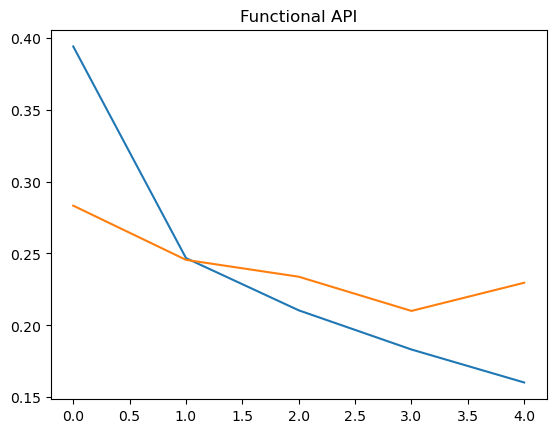

In [58]:
### Loss per iteration
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])
plt.title("Functional API")

Text(0.5, 1.0, 'Sequential API')

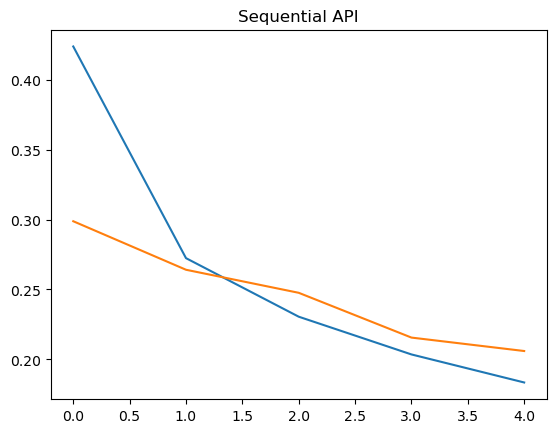

In [57]:
### Loss per iteration
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title("Sequential API")

Text(0.5, 1.0, 'Functional API')

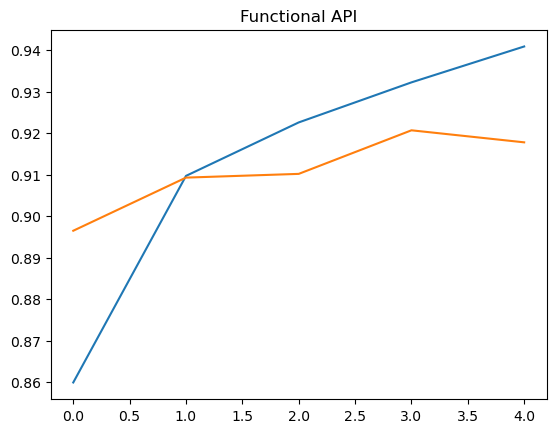

In [61]:
### Accuracy per iteration
plt.plot(result2.history['accuracy'])
plt.plot(result2.history['val_accuracy'])
plt.title("Functional API")

Text(0.5, 1.0, 'Sequential API')

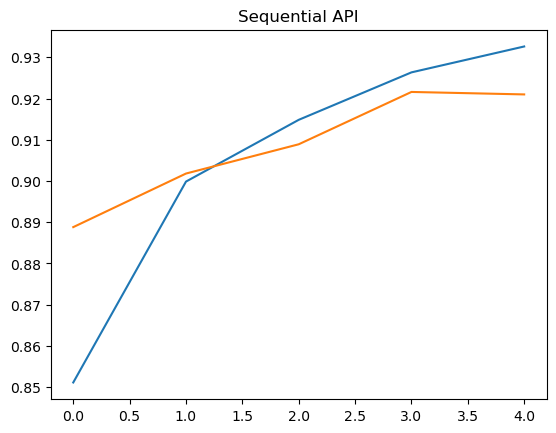

In [62]:
### Accuracy per iteration
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title("Sequential API")